# **MIE1516 Project: Traffic Sign Recognition via CNN Architectures**

## Table of Content

* [1.0 Introduction](#1.0)
    * [1.1 Motivation](#1.1)
    * [1.2 Data Overview](#1.2)
      * [1.2.1 Data Preprocessing](#1.2.1)
* [2.0 Methodology](#2.0)
    * [2.1 LeNet5](#2.1)
    * [2.2 ACB-LeNet5](#2.2)
    * [2.3 2-stage LeNet5](#2.3)
    * [2.4 Model Specification](#2.4)
      * [2.4.1 LeNet5](#2.4.1)
      * [2.4.2 ACB-LeNet5](#2.4.2)
      * [2.4.3 2-stage LeNet5](#2.4.3)
    * [2.5 Model Results Preview](#2.5)
* [3.0 Experiments](#3.0)
    * [3.1 Package](#3.1)
    * [3.2 System Setup](#3.2)
    * [3.3 Data Preprocessing](#3.3)
      * [3.3.1 Load Image](#3.3.1)
      * [3.3.2 Data Exploratory Analysis](#3.3.2)
      * [3.3.3 Data Generator](#3.3.3)
    * [3.4 Model Design & Implementation](#3.4)
      * [3.4.1 LeNet-5 Implementation](#3.4.1)
      * [3.4.2 ACB-LeNet-5 Implementation](#3.4.2)
        * [3.4.2.1 Training CNN Layers In ACB](#3.4.2.1)
        * [3.4.2.2 Weight Calculation](#3.4.2.2)
        * [3.4.2.3 LeNet-5 Redeployment](#3.4.2.3)
      * [3.4.3 Two-stage LeNet-5 Implementation](#3.4.3)
* [4.0 Results & Discussion](#4.0)
* [5.0 Conclusion](#5.0)
* [6.0 Future Work](#6.0)
* [7.0 References](#7.0)

## 1.0 Introduction

With the development of the deep neural network, pattern recognition applications, such as speech recognition and handwritten recognition, have been widely used in modern industries. For example, Apple created a virtual speech assistant 'Siri', which can intelligently recognize human being's voices and translate them into text. Tablets, like iPad and Google Pixel Slate, allow people to use a stylus to handwrite on screens, and then computers turn the handwriting into a digital text. Similarly, traffic sign recognition is also a part of pattern recognition applications, where its functionality is to identify traffic rules from images for assistance. Therefore, the purpose of this project is to construct such a recognition system by using convolutional neural networks.

### 1.1 Motivation

Throughout the course of learning deep neural networks, building a customized DNN architecture and making it applicable is one of the abilities I would like to master. Deep learning is a just subset of machine learning. The goal of deep learning is to use the information learned from data to help business decision as support. Some advanced DNNs can even automate this kind of process. 

There are two types of DNN architectures commonly used in recent applications. One is named as a recurrent neural network (RNN) and the other one is called a convolutional neural network (CNN). Generally speaking, RNN and CNN can both perform better than each other under different scenarios. RNN is very good at dealing with serial data, where data is sequenced one after another like sentences. But it suffers greatly from a long time of training model. On the other hand, CNN is powerful for handling two-dimensional data such as images. One application using CNN is image classification.

This project was initially aimed to develop an architecture with a combination of CNN and RNN for image captioning. However, due to the lack of hardware, the training of a baseline model takes too much time to complete. Thus, this project is switched to solve an image classification problem, where CNN architectures are built and developed based on prior research work from other people.


### 1.2 Data Overview

The dataset of this project was originally acquired from the website [GTSRB - German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign).

```
It has the following attributes:

* 43 classes for various traffic signs
* 51839 images, including 39209 images as a training dataset and 12630 as a testing dataset
* '.csv' files comprise 8 different features to describe each sample
```

A showcase of a CSV file for the training dataset is presented below:

|    |   Width |   Height |   Roi.X1 |   Roi.Y1 |   Roi.X2 |   Roi.Y2 |   ClassId | Path                           |
|---:|--------:|---------:|---------:|---------:|---------:|---------:|----------:|:-------------------------------|
|  0 |      27 |       26 |        5 |        5 |       22 |       20 |        20 | Train/20/00020_00000_00000.png |
|  1 |      28 |       27 |        5 |        6 |       23 |       22 |        20 | Train/20/00020_00000_00001.png |
|  2 |      29 |       26 |        6 |        5 |       24 |       21 |        20 | Train/20/00020_00000_00002.png |
|  3 |      28 |       27 |        5 |        6 |       23 |       22 |        20 | Train/20/00020_00000_00003.png |
|  4 |      28 |       26 |        5 |        5 |       23 |       21 |        20 | Train/20/00020_00000_00004.png |


To make it more clear, a histogram is shown below to visualize the number of images in each class.

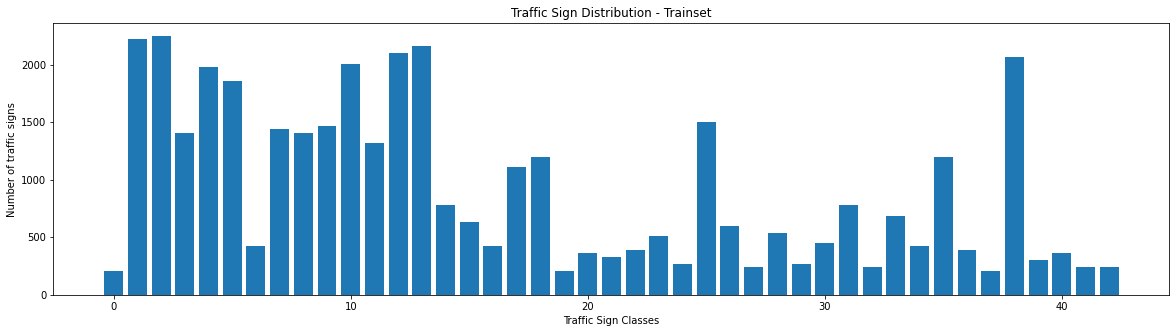

In [8]:
from IPython.display import Image
Image(filename='classes.png')

Noticeably, data samples are not evenly distributed across the entire dataset. Some classes like Class 1 and 2 have more samples than the classes like Class 0 do. If a baseline model underperforms, data argumentation should be considered to use to raise the model accuracy.

#### 1.2.1 Data Preprocessing



It is discovered that images are collected with a different size. Thus, before loading images into a baseline model with a CNN architecture, the size of images should be predetermined to ensure proper working conditions. For convenience, images are resized into a shape of 32 pixels by 32 pixels. The input of all models should follow this order.

**Note: Data is loaded and transformed into a form of ".npy" file via a jupyter notebook in a local computer with the code in "image_preprocessing" class. Google Colab is pretty slow for this kind of process.**

After loading and transformation, examples of the pictures of traffic sign from the training dataset and testing dataset are shown respectively as follows:

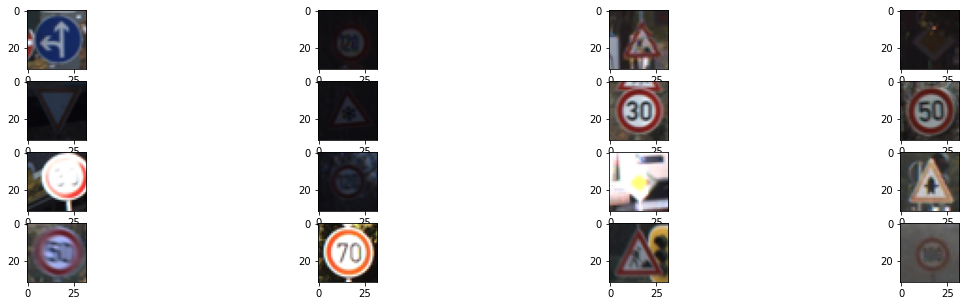

In [9]:
Image(filename='Train.png')

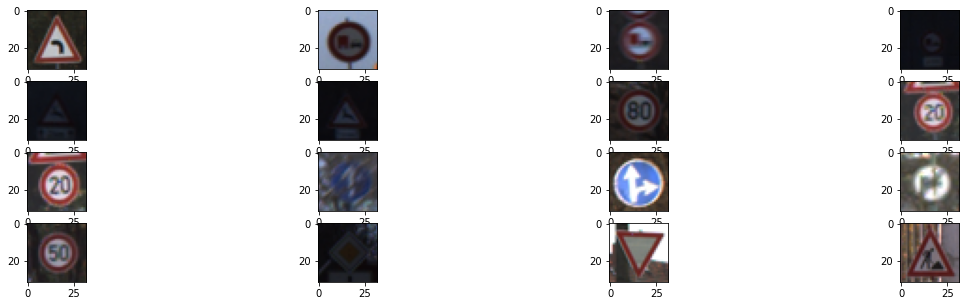

In [10]:
Image(filename='Test.png')

## 2.0 Methodology



Three methods of CNN architectures are employed for this project:

### 2.1 LeNet5

A baseline model - LeNet5, developed by LeCun etc. in 1998 for the application of document recognition [1]

* This model is one of the eariliest convolutionary neural networks and propels the field of deep learning. The name "LeNet5" was dervied from a series of work done by LeCun and his collegues since 1988. The design of this architecture is exhibited below:

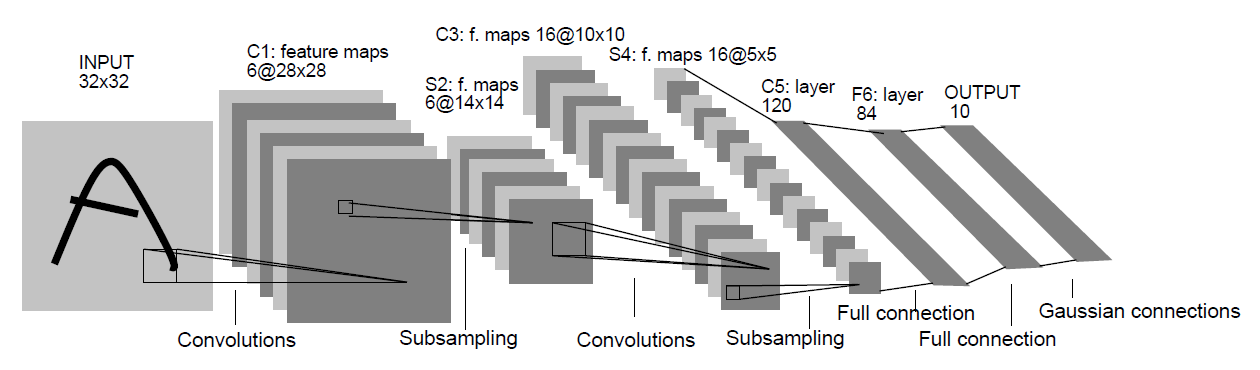

In [11]:
Image(filename='LeNet5.PNG')

### 2.2 ACB-LeNet5 

Evolved LeNet5 model via Asymmetric Convolution Block (ACB)

* This model extracts the idea of asymmetric convolution block from the pioneering work done by Ding etc.[2]
* Essentially, ACB is a block of 3 convolutional layers. Each convolutional layer is trained separately by the same input. The output from each convolutional layer will then be further batch normalized and summed up into one convolutional layer.
* The biggest advantage of using ACB is that it can enhance the model performance in terms of accuracy without changing the original architecture at all. In other words, it can improve a model without any extra layers during the deployment. This is achieved by replacing the original weights of CNN layers with the trained weights from ACB block only. The schematic of this process is clearly illustrated in the paper, which is shown below:


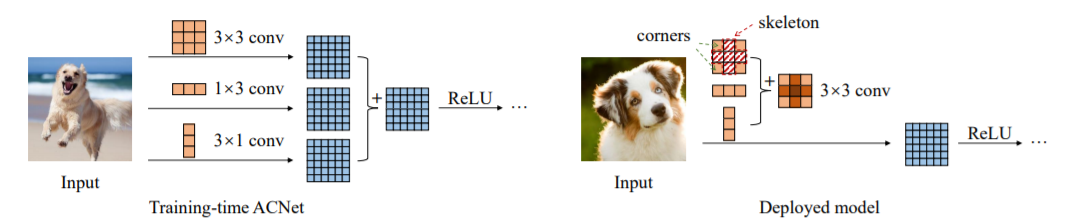

In [12]:
Image(filename='ACB2.PNG')

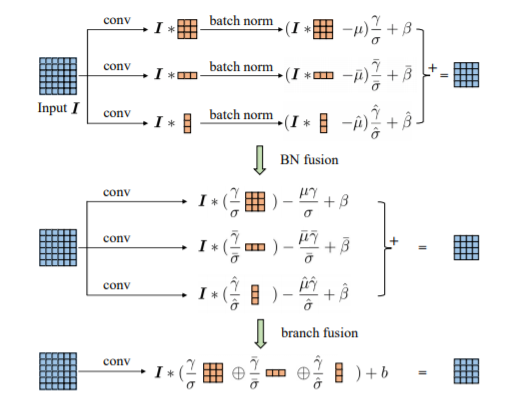

In [13]:
Image(filename='ACB1.PNG')

To understand better, let's break down the pictures above. 

**Part 1: Training ACB**

Step 1: Use 3x3, 1x3 and 3x1 kernels to extract features from the same input separately

Step 2: Batch normalize the output from each CNN layer

Step 3: Sum up all three results into one output, which contains the same shape as the original output without using ACB.


**Part 2: ACB deployment**

Step 1: Extract the weights from trained 3x3, 1x3 and 3x1 kernels in ACB

Step 2: Form a new reweighted 3x3 kernel, where the center column and center row is more weighted than the four corners. (See the dark orange dark in a cross shape)

Step 3: Replace the original 3x3 kernel with this new reweighted 3x3 kernel.

Step 4: Train the original architecture after CNN's weight replacement.


Thus, the evolved LeNet5 model with ACB is essentially the same as the original LeNet5 architecture in terms of the deployment. But the training process of ACB requires additional CNN layers and BN layers.

### 2.3 2-stage LeNet5


* This model is a next-level generation of LeNet5 proposed by LeCun etc. in 2011. The main idea behind this design is to feed 1st stage features in addition to 2nd stage features for image classification by concatenating the outputs from 2 stages in the dense layer.[3]
* A quick review of the model architecture is shown below:

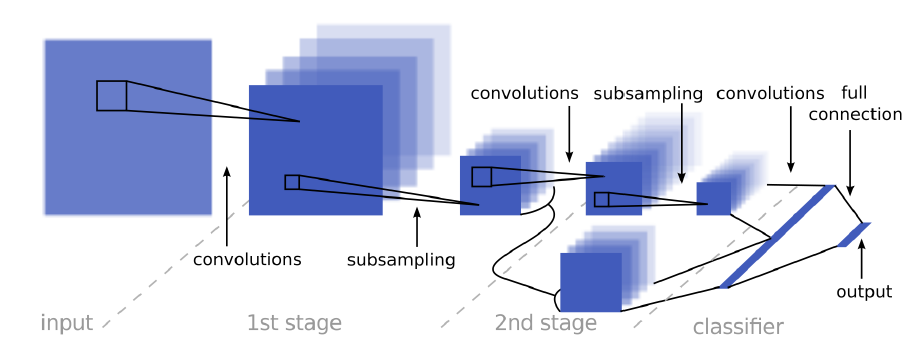

In [14]:
Image(filename='2stageLeNet5.PNG')

### 2.4 Model Specification

Using reference above, the specifications of three proposed CNN architectures are demonstrated as follows: 


#### 2.4.1 LeNet5

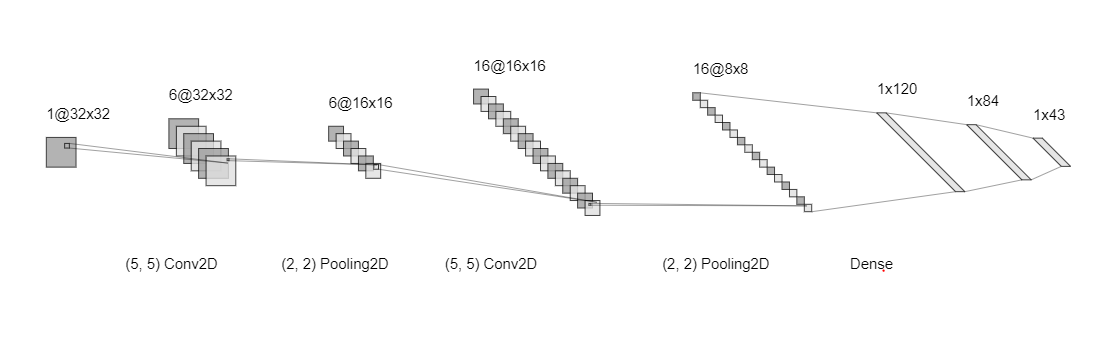

In [15]:
Image(filename='LeNet5 model.PNG')

Where:
* (5,5) and (2,2) in the description of the name represent the kernel size
* digit number before "@" is the number of filters
* digit numbers after "@" is the output shape

#### 2.4.2 ACB-LeNet5

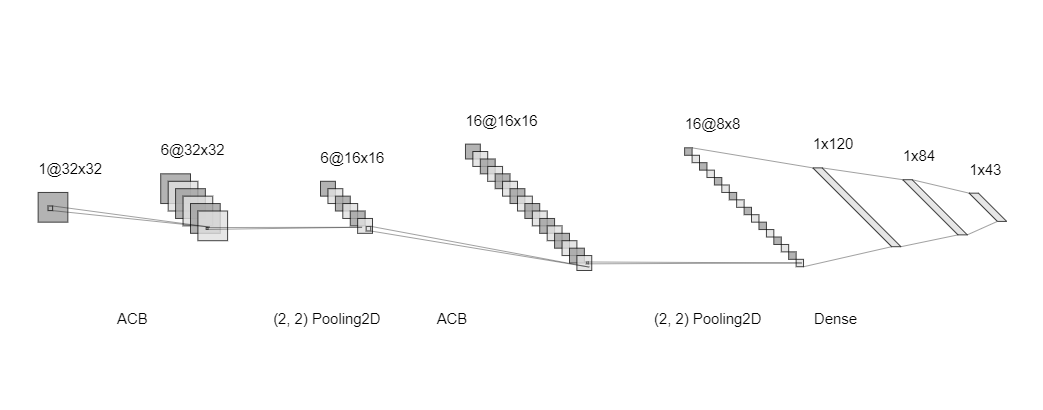

In [16]:
Image(filename='ACB model.PNG')

Esstentially, ACB-LeNet5 has the exactly same architecture as LeNet5 does. The only difference is the weights of the CNN layers.

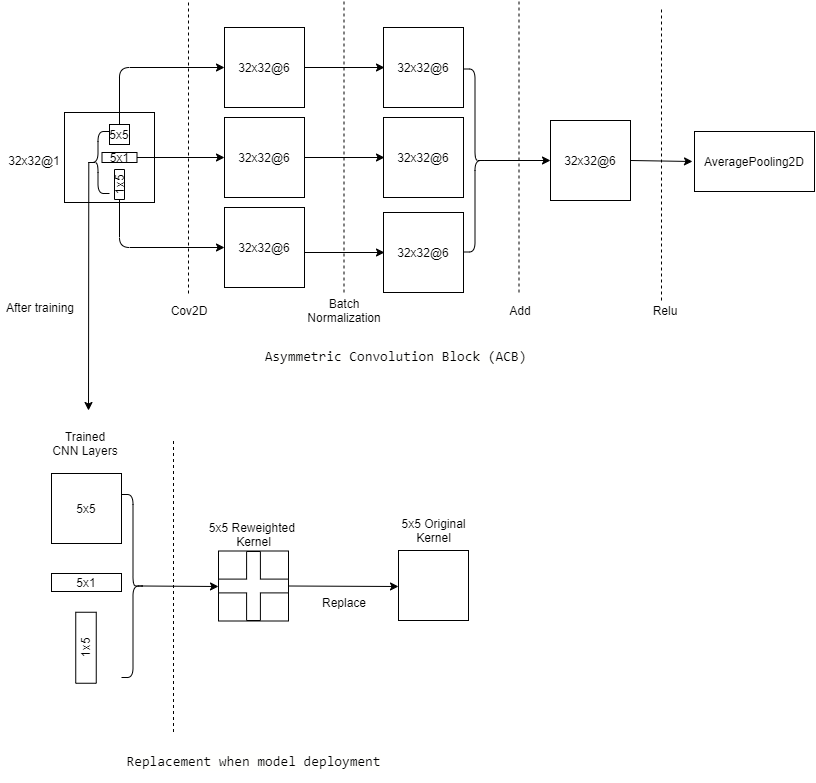

In [17]:
Image(filename='ACB model Schematic.png')

The diagram above shows how Asymmetric Convolution Block is built in this project and how weights are integrated from three kernels into one kernel to replace the weights in the original kernel.  

The top architecture in the diagram shows that a single input is "convolutionized" by three different kernels with sizes of (5, 5), (5, 1) and (1, 5). Then each output will experience the process of batch normalization, where the shape of the output of that maintains the same. Lastly, three outputs are added on the top of each other to guarantee a single output as LeNet5 does.

The bottom architecture shows three trained kernels are combined in a "cross" fashion to replace the original kernel in LeNet5. The purpose of this is to show using weights from ACB can effectively improve the original model performance. Section 3.4.2.3 below achieved this goal.

#### 2.4.3 2-stage LeNet5

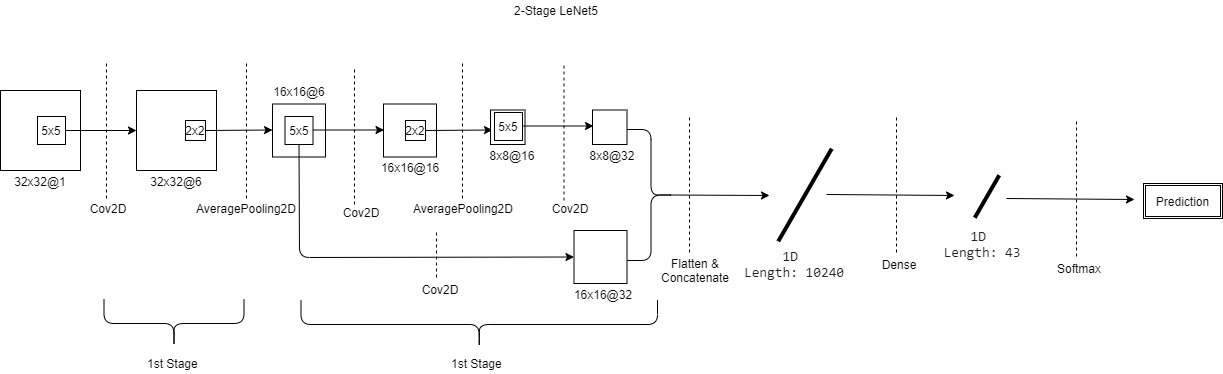

In [18]:
Image(filename='2-stage LeNet5 model.png')

The choices of kernel size remain the same as ones used in LeNet5 to attain the purpose of control experiments. Unlike the design of LeNet5, 2-stage LeNet5 has three convolutional layers in the mainline in addition to one convolutional layer in its branch. After the last convolutional layer, the depth of channels in each line can reach to 32. The outputs are further flattened and concatenated along one axis before a dense layer. The number of outcomes is still 43, which matches with the number of classes.

### 2.5 Model Results Preview

See section 4.0 for more details on discussion

In [58]:
pd.DataFrame(model_results.values(), index = model_results.keys(), columns = ['LOSS', 'ACCURACY']) \
  .sort_values(by=['ACCURACY'])

,LOSS,ACCURACY
LeNet-5 Model,1.065471,0.869359
2-stage LeNet-5 Model,1.203263,0.887490
LeNet-5 Redeployment Model,1.176821,0.891132
ACB-LeNet5 Model,0.480259,0.914489


## 3.0 Experiments

The following sections demonstrate the project implementation through codes. Most codes will be attached with comments for ease of understanding.

### 3.1 Package

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# All packages required for this project are listed below
import os
import glob
import random
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from PIL import Image

import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, BatchNormalization, Add, Activation, ReLU, Softmax, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [21]:
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0-rc2


### 3.2 System Setup

In [0]:
def system_path_setup(directory):
    path = os.path.join(initial_path, directory)
    return path

# check the current system path
initial_path = os.getcwd()

# Setup a project directory
project_dir = '/content/drive/My Drive/UTSG/2019 Winter - MIE1516/Project2/gtsrb-german-traffic-sign'
project_path = system_path_setup(project_dir)
os.chdir(project_path)

### 3.3 Data Preprocessing



In [0]:
class image_preprocessing():

    def __init__(self):
        pass
    
    # Read the 
    def read_csv(self, csv_dir):
        '''
        Extract x path and y target values from csv file
        '''
        csv_info = pd.read_csv(csv_dir)
        
        # Fix the shuffle method
        np.random.seed(10)
        # Shuffle the data
        csv_info = csv_info.iloc[np.random.permutation(len(csv_info))]
        # Extract columns values from the dataframe
        x_path = csv_info['Path'].values
        y_train = csv_info['ClassId'].values
        return x_path, y_train
    
    def load_transform_data(self, x_path, y_list):
        '''
        Extract image data into arrays
        
        One-hot encoding y target values

        (This step is done in a local environment)
        '''
        # One-hot encoding y target values
        y_trans = to_categorical(y_list, len(np.unique(y_list)))
        
        # Turn images into pixel values and save it into a list
        x_data =[]
        for i, f in enumerate(x_path):
            print('\rLoading data {0:.1f}%...'.format((i / len(x_path)) * 100), end = '\r')
            image = Image.open(os.path.join(project_path, f))
            cropped_image = image.resize((32,32))
            x_data.append(np.array(cropped_image))

        return x_data, y_trans
    
    
    def normalization(self, data):
        '''
        Normalize pixel values between [0, 1]

        (This step is done in a local environment)
        '''
        return np.array(data).astype('float32') / 255.0
    
    def save_file(self, array, file_name):
        '''
        Save results into .npy format 

        (This step is done in a local environment)
        '''
        return np.save(file_name, array)
    
    def data_generator(self, x, y, bs, seed = 10):
        '''
        Use a generator to feed data to models

        bs: batch size
        '''
        datagen = ImageDataGenerator()
        generator = datagen.flow(x,
                                 y,
                                 batch_size=bs,
                                 shuffle=True,
                                 seed=seed)
        return generator, bs

    def data_visualization(self, img_array, method, plot_title = None):
        '''
        Generate plots
        '''
        # Generate traffic sign images
        fig = plt.figure(figsize=(20,5))
        if method == 'picture':
          columns = 4
          rows = 4
          for i, image in enumerate(img_array):
              if i == rows*columns: break
              fig.add_subplot(rows, columns, i + 1)
              plt.imshow(image)
          plt.show()
        # Generate a bar plot
        elif method == 'bar':
          _, y = self.read_csv('Train.csv')
          plot_data = {}
          for value in y:
            if value not in plot_data:
              plot_data[value] = 1
            else:
              plot_data[value] += 1
          lists = sorted(plot_data.items()) 
          x, y = zip(*lists) 
          plt.title(plot_title)
          plt.bar(x, y)
          plt.xlabel('Traffic Sign Classes')
          plt.ylabel('Number of traffic signs')
          plt.show()

#### 3.3.1 Load Image 

In [0]:
img_process = image_preprocessing()

if 'x_train.npy' not in os.listdir():
  # Data loading and transforming process
  x_train, y_train = img_process.read_csv('Train.csv')
  x_train, y_train = img_process.load_transform_data(x_train, y_train)
  x_train = img_process.normalization(x_train)
  img_process.save_file(x_train, 'x_train.npy')
  img_process.save_file(y_train, 'y_train.npy')
else:
  # Load the previously saved results for training dataset
  x_train = np.load('x_train.npy')
  y_train = np.load('y_train.npy')

if 'x_test.npy' not in os.listdir():
  # Data loading and transforming process
  x_test, y_test = img_process.read_csv('Test.csv')
  x_test, y_test = img_process.load_transform_data(x_test, y_test)
  x_test = img_process.normalization(x_test)
  img_process.save_file(x_test, 'x_test.npy')
  img_process.save_file(y_test, 'y_test.npy')
else:
  # Load the previously saved results for testing dataset
  x_test = np.load('x_test.npy')
  y_test = np.load('y_test.npy')

#### 3.3.2 Data Exploratory Analysis 

The plots in this section have already been moved to section 1.2 Data Overview

In [0]:
img_process.data_visualization(x_train, method = 'picture')

In [0]:
img_process.data_visualization(x_test, method = 'picture')

In [0]:
img_process.data_visualization(None, method = 'bar', plot_title = 'Traffic Sign Distribution - Trainset')

#### 3.3.3 Data Generator

In [0]:
# Change it to greyscale to shrink the size of input dataset
x_train_grey = rgb2gray(x_train).reshape(-1, 32, 32, 1)

# Training dataset is partitioned into two parts:
# Traning set with 80% of original dataset
# Validation set with 20% of original dataset
x_train_grey, x_val, y_train_grey, y_val = train_test_split(x_train_grey, y_train, test_size=0.2, random_state=10)

In [0]:
# Training set generator
train_generator, b_size = img_process.data_generator(x_train_grey, y_train_grey, bs = 256, seed = 10)

# Validation set generator
val_generator, _ = img_process.data_generator(x_val, y_val, bs = 256, seed = 10)

### 3.4 Model Design & Implementation

This subsection includes the design of all three proposed architectures mentioned above. It is worth mentioning that all the convolutional layers use the "same" padding method. By definition, it means the size of output feature-maps is equal to the input feature-maps. The consequence of this setting is that the size of output feature-maps in this project is not the same as the size of output feature-maps in reference papers.

In [0]:
class model_design():

    def __init__(self):
        self.num_calss = 43

    # ===========================================================================================

    def base_model(self):
        '''
        LeNet5 architecture
        '''
        model = Sequential()
        # 1st convolutional layer
        model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1), padding = 'same'))
        model.add(AveragePooling2D())
        # 2nd convolutional layer
        model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding = 'same'))
        model.add(AveragePooling2D())
    
        model.add(Flatten())
        model.add(Dense(120, activation='relu'))
        model.add(Dense(84, activation='relu'))
        model.add(Dense(self.num_calss, activation = 'softmax'))
        
        print(model.summary())
        return model

    # ===========================================================================================

    def ACB(self, input_tensor, filter_size):
        '''
        Asymmetric Convolution Block Architecture (ACB)
        '''
        # 3 convolutional layers connected with the same input
        square_kernel = Conv2D(filters=filter_size, kernel_size=(5, 5), padding = 'same')(input_tensor)
        vertical_kernel = Conv2D(filters=filter_size, kernel_size=(5, 1), padding = 'same')(input_tensor)
        horizontal_kernel = Conv2D(filters=filter_size, kernel_size=(1, 5), activation='relu', padding = 'same')(input_tensor)
        
        # 3 independent batch normalization layers connected with one of the outputs from previous CNN layers 
        initializer = tf.constant_initializer(value=1/3)

        BN_square_block = BatchNormalization(momentum=0.99, 
                                             epsilon=0.001,
                                             gamma_initializer = initializer,
                                             beta_initializer = initializer)(square_kernel)
        BN_vertical_block = BatchNormalization(momentum=0.99, 
                                               epsilon=0.001,
                                               gamma_initializer = initializer,
                                               beta_initializer = initializer)(vertical_kernel)
        BN_horizontal_block = BatchNormalization(momentum=0.99, 
                                                 epsilon=0.001,
                                                 gamma_initializer = initializer,
                                                 beta_initializer = initializer)(horizontal_kernel)
        
        # Sum up results in an element-wise manner
        fused_layers = Add()([BN_square_block, BN_vertical_block, BN_horizontal_block])

        # Use a 'relu' acitivation function to complete results
        fused_layers = Activation('relu')(fused_layers)
        
        return fused_layers

    def model_with_ACB(self):
        '''
        ACB-LeNet5 architecture

        * Similar to LeNet5 architecture
        * Replace Con2D by ACB
        * The shape of the outputs of ACB remains unchanged
        * Other than ACB, specifications remains the same

        The purpose of this architecture is to train the weights of CNN layers inside ACB
        '''
        model_input = tf.keras.Input(shape=(32, 32, 1))
        # 1st ACB convolutional layer
        AC_out1 = self.ACB(model_input, filter_size = 6)
        pool_out1 = AveragePooling2D()(AC_out1)
        # 2nd ACB convolutional layer
        AC_out2 = self.ACB(pool_out1, filter_size = 16)
        pool_out2 = AveragePooling2D()(AC_out2)

        flatten = Flatten()(pool_out2)
        fc1 = Dense(units = 120)(flatten)
        fc1 = ReLU()(fc1)
        fc2 = Dense(units = 84)(fc1)
        fc2 = ReLU()(fc2)
        fc3 = Dense(units = self.num_calss)(fc2)
        fc3 = Softmax()(fc3)

        model = Model(inputs = model_input, outputs = fc3)
        print(model.summary())

        return model

    # ===========================================================================================
   
    def model_with_2stages(self):
        '''
        2-stage LeNet5
        '''
        model_input = tf.keras.Input(shape=(32, 32, 1))
        '''
        1st stage
        '''
        conv1_main = Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding = 'same')(model_input)
        # Output
        pool_out1_main = AveragePooling2D()(conv1_main)
 
        '''
        2nd stage
        '''
        conv2_main = Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding = 'same')(pool_out1_main)
        pool_out2_main = AveragePooling2D()(conv2_main)

        conv3_main = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same')(pool_out2_main)

        # Use the output from 1st stage as an input to conduct an additional convolutional operation
        conv3_branch = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same')(pool_out1_main)
        '''
        Classifier
        '''
        # Concatenate the outputs from two final CNN layers
        flatten1 = Flatten()(conv3_main)
        flatten2 = Flatten()(conv3_branch)
        con1 = Concatenate()([flatten1, flatten2])

        fc1 = Dense(units = self.num_calss)(con1)
        fc2 = Softmax()(fc1)

        model = Model(inputs = model_input, outputs = fc2)
        print(model.summary())
        
        return model

    # ===========================================================================================

    def _compile(self, model):
        '''
        Model compiler

        (Remain unchanged throughout this project)
        '''
        return model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    def _train(self, model, train_gen, train_steps, val_gen, epochs):
        '''
        Model training function

        (Remain unchanged throughout this project)
        '''
        start_time = time.time()

        history = model.fit_generator(train_gen, 
                                      steps_per_epoch = train_steps, 
                                      epochs = epochs, 
                                      validation_data = val_gen, 
                                      validation_steps = len(x_val) // b_size)
                
        end_time = time.time()
        print('==============================')
        print('Trained in {0:.2f} minutes'.format((end_time - start_time) / 60))

        return history
    
    def plot_history(self, history):
        '''
        Plot function for training results

        (Remain unchanged throughout this project)
        '''
        acc=history.history['accuracy']
        loss=history.history['loss']
        val_acc = history.history['val_accuracy']
        val_loss = history.history['val_loss']
        epochs = range(len(acc))

        fig = plt.figure(figsize=(15,5))
        fig.add_subplot(1, 2, 1)
        plt.plot(epochs, acc, 'r', label='train_acc')
        plt.plot(epochs, val_acc, 'g', label='val_acc')
        plt.title('Training accuracy')
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy %')

        fig.add_subplot(1, 2, 2)
        plt.plot(epochs, loss, 'r', label='train_loss')
        plt.plot(epochs, val_loss, 'g', label='val_loss')
        plt.title('Training loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

In [0]:
def append_model_results(results, data, model_name):
  '''
  Result saving function
  '''
  results[model_name] = data
model_results = {}

#### 3.4.1 LeNet-5 Implementation

In [32]:
# LeNet-5 model preparation
model = model_design()
base_model = model.base_model()
model._compile(base_model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               123000    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [33]:
# LeNet-5 model training
history = model._train(base_model, 
                       train_gen = train_generator, 
                       train_steps = x_train_grey.shape[0] // b_size, 
                       val_gen = val_generator, 
                       epochs = 30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
122/122 [==============================] - 1s 7ms/step - loss: 2.8966 - accuracy: 0.2486 - val_loss: 1.8134 - val_accuracy: 0.4927
Epoch 2/30
122/122 [==============================] - 1s 5ms/step - loss: 1.2811 - accuracy: 0.6386 - val_loss: 0.9686 - val_accuracy: 0.7181
Epoch 3/30
122/122 [==============================] - 1s 5ms/step - loss: 0.7846 - accuracy: 0.7768 - val_loss: 0.6700 - val_accuracy: 0.8151
Epoch 4/30
122/122 [==============================] - 1s 5ms/step - loss: 0.5923 - accuracy: 0.8345 - val_loss: 0.5335 - val_accuracy: 0.8578
Epoch 5/30
122/122 [==============================] - 1s 5ms/step - loss: 0.4543 - accuracy: 0.8752 - val_loss: 0.4503 - val_accuracy: 0.8780
Epoch 6/30
122/122 [==============================] - 1s 5ms/step - loss: 0.3842 - accuracy: 0.8960 - val_loss: 0.3893 - val_accuracy: 0.8923
Epoch 7/30
122/122 [==============================] - 1s 5ms/step - loss

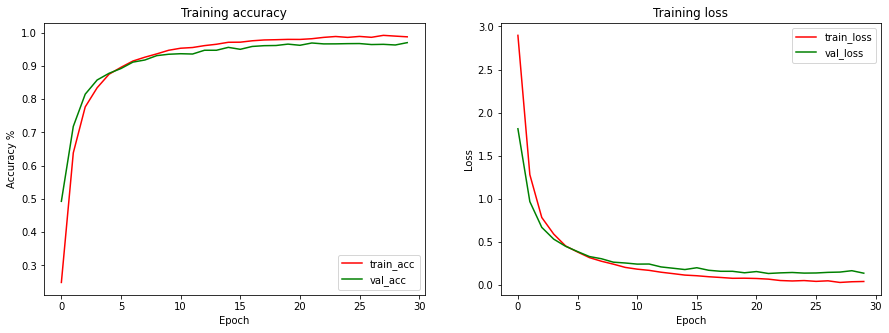

In [34]:
# LeNet-5 result presentation
model.plot_history(history)

In [0]:
# Save weights for the later use in LeNet-5 Redeployment
base_model.save_weights('LeNet_weights.h5')

In [36]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')

x_test_grey = rgb2gray(x_test).reshape(-1, 32, 32, 1)
results = base_model.evaluate(x_test_grey, y_test, batch_size=128)

# Append results
append_model_results(model_results, results, 'LeNet-5 Model')


# Evaluate on test data
99/99 [==============================] - 0s 2ms/step - loss: 1.0655 - accuracy: 0.8694


#### 3.4.2 ACB-LeNet-5 Implementation

###### 3.4.2.1 Training CNN Layers In ACB 

In [37]:
# ACB-LeNet5 model preparation
model2 = model_design()
ACB_model = model2.model_with_ACB()
model2._compile(ACB_model)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 6)    156         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 6)    36          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 6)    36          input_1[0][0]                    
______________________________________________________________________________________________

In [38]:
# ACB-LeNet5 model training
history2 = model2._train(ACB_model, 
                         train_gen = train_generator, 
                         train_steps = x_train_grey.shape[0] // b_size, 
                         val_gen = val_generator, 
                         epochs = 30)

Epoch 1/30
122/122 [==============================] - 1s 11ms/step - loss: 2.8518 - accuracy: 0.2470 - val_loss: 3.2696 - val_accuracy: 0.1233
Epoch 2/30
122/122 [==============================] - 1s 10ms/step - loss: 1.2494 - accuracy: 0.6456 - val_loss: 1.8788 - val_accuracy: 0.4470
Epoch 3/30
122/122 [==============================] - 1s 10ms/step - loss: 0.6611 - accuracy: 0.8141 - val_loss: 1.1232 - val_accuracy: 0.6603
Epoch 4/30
122/122 [==============================] - 1s 10ms/step - loss: 0.4375 - accuracy: 0.8814 - val_loss: 0.5627 - val_accuracy: 0.8536
Epoch 5/30
122/122 [==============================] - 1s 10ms/step - loss: 0.3205 - accuracy: 0.9160 - val_loss: 0.4122 - val_accuracy: 0.8819
Epoch 6/30
122/122 [==============================] - 1s 10ms/step - loss: 0.2457 - accuracy: 0.9368 - val_loss: 0.2601 - val_accuracy: 0.9337
Epoch 7/30
122/122 [==============================] - 1s 10ms/step - loss: 0.1883 - accuracy: 0.9535 - val_loss: 0.2001 - val_accuracy: 0.9484

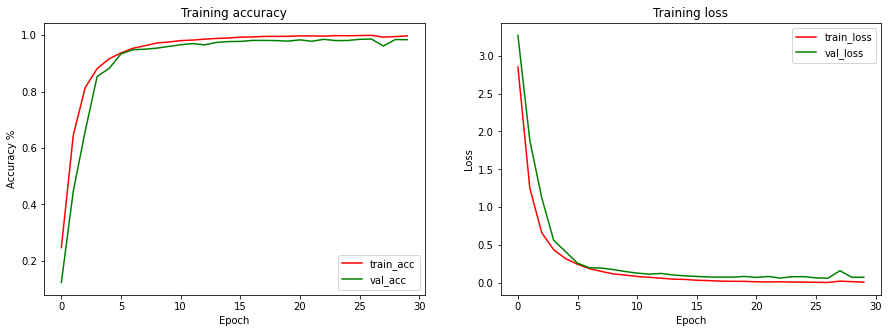

In [39]:
# ACB-LeNet5 result presentation
model2.plot_history(history2)

In [40]:
# Evaluate and append results
print('\n# Evaluate on test data')
results = ACB_model.evaluate(x_test_grey, y_test, batch_size=128)
append_model_results(model_results, results, 'ACB-LeNet5 Model')


# Evaluate on test data
99/99 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.9145


##### 3.4.2.2 Weight Calculation

This subsection presents the work on how to extract the trained weights from three different kernels in ACB and integrate them into one kernel.

In our case, we have three kernels that have been trained - (5, 5) kernel, (1, 5) kernel and (5, 1) kernel. Our goal is to get a new (5, 5) kernel where its weights are the integration of three kernels. The graph below explains how this kind of integration should be done:

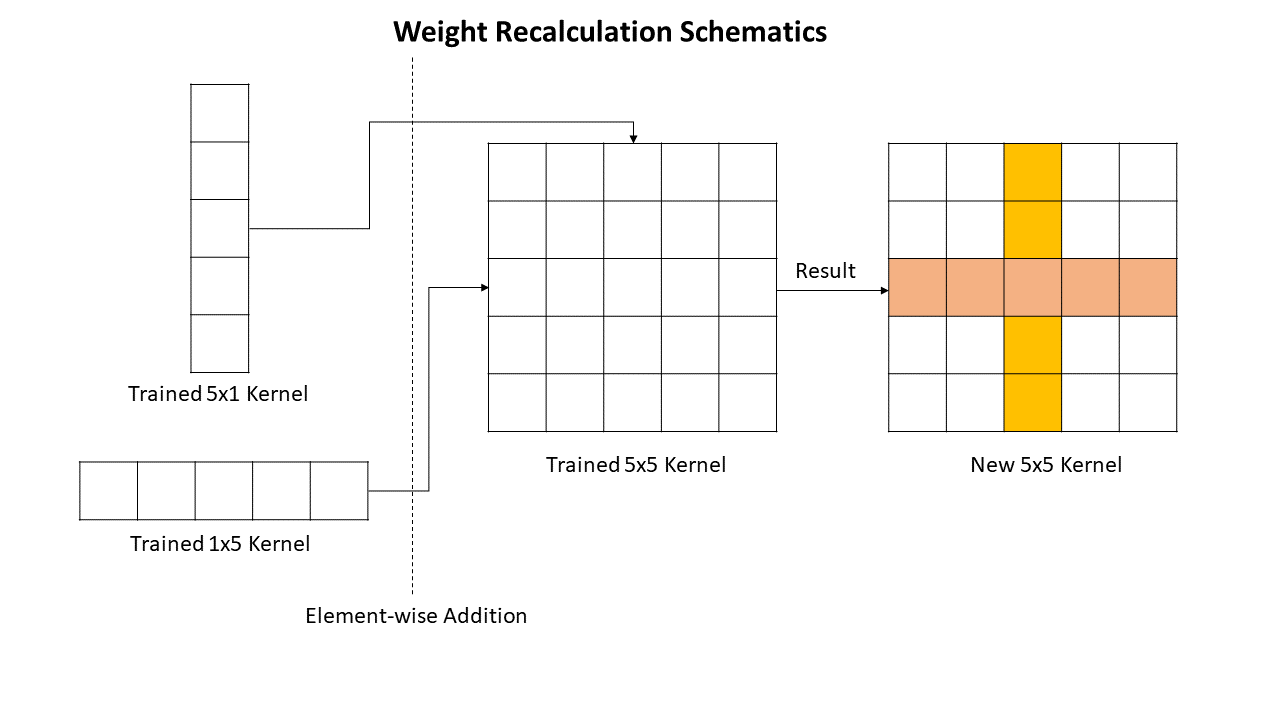

In [41]:
from IPython.display import Image
Image(filename='weight recalculation.png')

In LeNet5, there are two convolutional layers. While in ACB-LeNet5, there are two ACBs. Thus, the codes below are to find three convolutional layers in each ACB to prepare for weight recalculations.

In [42]:
# Lists to store CNN layers
con2d_weights1 = []
con2d_weights2 = []

num = 0
for layer in ACB_model.layers:
  if type(layer) == Conv2D:
    # CNN layers are sequentially trained
    # Thus, the first 3 layers belong to the 1st ACB
    if num < 3:
      num += 1
      con2d_weights1.append(layer.get_weights())
      print('This layer is in 1st ACB:', type(layer))
    # The last 3 layers are assigned to the 2nd ACB
    else:
      con2d_weights2.append(layer.get_weights())
      print('This layer is in 2nd ACB:', type(layer))

This layer is in 1st ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
This layer is in 1st ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
This layer is in 1st ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
This layer is in 2nd ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
This layer is in 2nd ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>
This layer is in 2nd ACB: <class 'tensorflow.python.keras.layers.convolutional.Conv2D'>


In [0]:
def weight_recalculation(weight_list, original_shape):
  '''
  Element-wise mathematic addition
  input: list of weights, with a length of 3
  output: a recalculated weight, with a shape of (5, 5)
  '''
  for i, weight in enumerate(weight_list):
    weight = weight[0]
    if i == 0:
      # The first CNN layer in each ACB has a kernel with a size of (5, 5)
      recalculated_weights = weight
    else:
      # Codes below is to perform element-wise addtion

      if weight.shape[:2] == (5, 1):
        # Extract the center column of weights in (5, 5) kernel and flatten it
        weight_part1 = recalculated_weights[:,2,:,:].flatten()
        # Flatten the (5, 1) kernel
        weight_part2 = weight.flatten()
        # Perform element-wise addition
        weight_add = (weight_part1 + weight_part2).reshape(recalculated_weights[:,2,:, :].shape)
        # Change the weight of the center column in (5, 5) kernel
        recalculated_weights[:,2,:,:] = weight_add 

      elif weight.shape[:2] == (1, 5):
        # Extract the center row of weights in (5, 5) kernel and flatten it
        weight_part1 = recalculated_weights[2,:,:,:].flatten()
        # Flatten the (1, 5) kernel
        weight_part2 = weight.flatten()
        # Perform element-wise addition
        weight_add = (weight_part1 + weight_part2).reshape(recalculated_weights[2,:,:,:].shape)
        # Change the weight of the center row in (5, 5) kernel
        recalculated_weights[2,:,:, :] = weight_add 

  return recalculated_weights.reshape(original_shape)

In [0]:
recalculated_weights1 = weight_recalculation(con2d_weights1, con2d_weights1[0][0].shape)
recalculated_weights2 = weight_recalculation(con2d_weights2, con2d_weights2[0][0].shape)

In [45]:
# Check the shape of the recalculated weights
print('Shape of 1st recalculated weight:', recalculated_weights1.shape)
print('Shape of 2nd recalculated weight:', recalculated_weights2.shape)

Shape of 1st recalculated weight: (5, 5, 1, 6)
Shape of 2nd recalculated weight: (5, 5, 6, 16)


##### 3.4.2.3 LeNet-5 Redeployment

In this subsection, the first step we do is to load the original LeNet-5 model and assigned the originally trained weights to it. The second step is to swap the weights in originally trained weights with recalculated weights. The last step is to train the dataset again to verify if the results are improved.

In [46]:
# LeNet5 model redeployment preparation
new_base_model = model.base_model()
new_base_model.load_weights('LeNet_weights.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               123000    
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

In [47]:
# Check the shape of original weights
print('Shape of 1st original weight:', new_base_model.layers[0].get_weights()[0].shape)
print('Shape of 2nd original weight:', new_base_model.layers[2].get_weights()[0].shape)

Shape of 1st original weight: (5, 5, 1, 6)
Shape of 2nd original weight: (5, 5, 6, 16)


As we can see from the results above, the shapes of the original weights are in alignment with the shapes of recalculated weights. 

This is what we are aiming at!!!

The codes below demonstrate recalculated weights are successful replacements of the original CNN weights.

In [0]:
# Weight replacement
weight_change1 = [recalculated_weights1, new_base_model.layers[0].get_weights()[1]]
new_base_model.layers[0].set_weights(weight_change1)

weight_change2 = [recalculated_weights2, new_base_model.layers[2].get_weights()[1]]
new_base_model.layers[2].set_weights(weight_change2)

# The weights in other layers except CNN layers should be the same as before 
for layers in new_base_model.layers:
  layer.trainable = False

In [0]:
model._compile(new_base_model)

In [50]:
# LeNet-5 model redeployment training
history3 = model._train(new_base_model, 
                        train_gen = train_generator, 
                        train_steps = x_train_grey.shape[0] // b_size, 
                        val_gen = val_generator, 
                        epochs = 30)

Epoch 1/30
122/122 [==============================] - 1s 7ms/step - loss: 1.5373 - accuracy: 0.5986 - val_loss: 0.3931 - val_accuracy: 0.9083
Epoch 2/30
122/122 [==============================] - 1s 6ms/step - loss: 0.2581 - accuracy: 0.9395 - val_loss: 0.2183 - val_accuracy: 0.9487
Epoch 3/30
122/122 [==============================] - 1s 5ms/step - loss: 0.1573 - accuracy: 0.9639 - val_loss: 0.1653 - val_accuracy: 0.9604
Epoch 4/30
122/122 [==============================] - 1s 5ms/step - loss: 0.1104 - accuracy: 0.9756 - val_loss: 0.1355 - val_accuracy: 0.9671
Epoch 5/30
122/122 [==============================] - 1s 5ms/step - loss: 0.0830 - accuracy: 0.9811 - val_loss: 0.1465 - val_accuracy: 0.9609
Epoch 6/30
122/122 [==============================] - 1s 5ms/step - loss: 0.0734 - accuracy: 0.9822 - val_loss: 0.1227 - val_accuracy: 0.9691
Epoch 7/30
122/122 [==============================] - 1s 6ms/step - loss: 0.0593 - accuracy: 0.9866 - val_loss: 0.1144 - val_accuracy: 0.9730
Epoch 

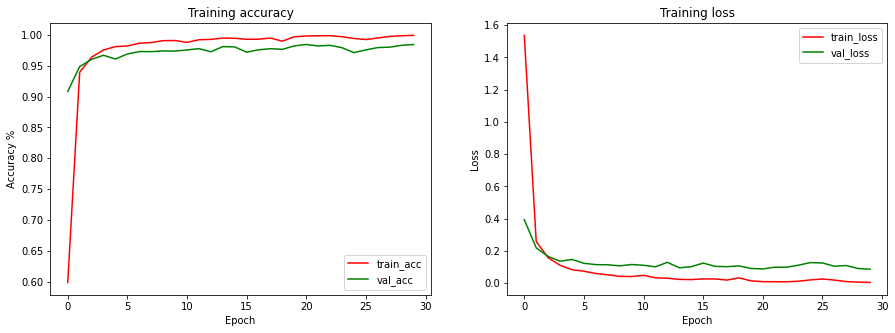

In [51]:
# LeNet5 model redeployment result presentation
model.plot_history(history3)

In [52]:
# Evaluate and append results
results = new_base_model.evaluate(x_test_grey, y_test, batch_size=128)
append_model_results(model_results, results, 'LeNet-5 Redeployment Model')

99/99 [==============================] - 0s 2ms/step - loss: 1.1768 - accuracy: 0.8911


#### 3.4.3 Two-stage LeNet-5 Implementation

In [53]:
# Two-stage LeNet-5 model preparation
model3 = model_design()
two_stage_model = model3.model_with_2stages()
model3._compile(two_stage_model)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 6)    156         input_2[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_6 (AveragePoo (None, 16, 16, 6)    0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 16, 16, 16)   2416        average_pooling2d_6[0][0]        
____________________________________________________________________________________________

In [54]:
# Two-stage LeNet-5 model training
history4 = model3._train(two_stage_model, 
                        train_gen = train_generator, 
                        train_steps = x_train_grey.shape[0] // b_size, 
                        val_gen = val_generator, 
                        epochs = 30)

Epoch 1/30
122/122 [==============================] - 1s 8ms/step - loss: 1.9878 - accuracy: 0.4856 - val_loss: 0.8576 - val_accuracy: 0.7533
Epoch 2/30
122/122 [==============================] - 1s 7ms/step - loss: 0.5138 - accuracy: 0.8706 - val_loss: 0.3563 - val_accuracy: 0.9164
Epoch 3/30
122/122 [==============================] - 1s 7ms/step - loss: 0.2699 - accuracy: 0.9368 - val_loss: 0.2366 - val_accuracy: 0.9398
Epoch 4/30
122/122 [==============================] - 1s 7ms/step - loss: 0.1655 - accuracy: 0.9618 - val_loss: 0.1844 - val_accuracy: 0.9516
Epoch 5/30
122/122 [==============================] - 1s 7ms/step - loss: 0.1210 - accuracy: 0.9731 - val_loss: 0.1519 - val_accuracy: 0.9621
Epoch 6/30
122/122 [==============================] - 1s 7ms/step - loss: 0.0888 - accuracy: 0.9796 - val_loss: 0.1168 - val_accuracy: 0.9699
Epoch 7/30
122/122 [==============================] - 1s 7ms/step - loss: 0.0650 - accuracy: 0.9856 - val_loss: 0.1033 - val_accuracy: 0.9737
Epoch 

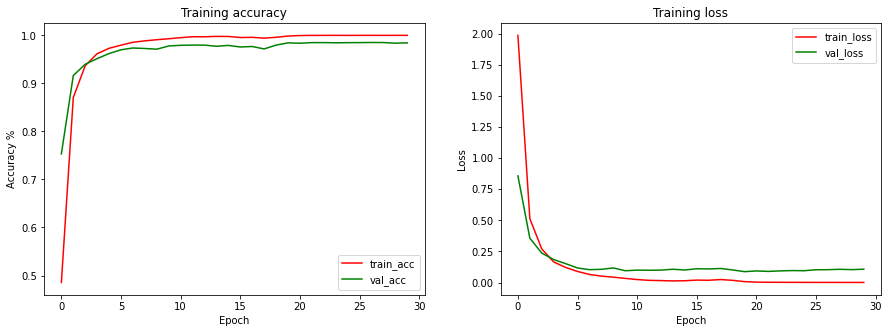

In [55]:
# Two-stage LeNet-5 result presentation
model3.plot_history(history4)

In [56]:
# Evaluate and append results
results = two_stage_model.evaluate(x_test_grey, y_test, batch_size=128)
append_model_results(model_results, results, '2-stage LeNet-5 Model')

99/99 [==============================] - 0s 3ms/step - loss: 1.2033 - accuracy: 0.8875


## 4.0 Results & Discussion

Four models are implemented to predict a test dataset. 

As stated in the methodology section, LeNet5 is served as a baseline model. 
ACB-LeNet5 models can be partitioned into 2 parts. In the 1st part, LeNet5 with Asymmetric Convolution Blocks (ACB) is built to train CNN layers in each ACB. In the 2nd part, LeNet-5 redeployment model with recalculated weights from trained CNN layers in ACB, is used to predict the same test dataset again for performance comparison. Finally, a two-stage LeNet-5 model with additional 2 CNN layers, is also constructed for prediction as a reference.

The table below shows the accuracy of prediction through each model. Under the same specifications, the LeNet-5 redeployment model has a higher accuracy of 0.891132 than the original LeNet-T model does. 2-stage LeNet-5 model has a close performance to the LeNet-5 redeployment model performance. ACB - LeNet5 model, which is used to train CNN layers in ACB, performs best among all models.

Based on these results, some facts can be drawn as follows:

* Using CNN layers with recalculated weights in the LeNet-5 redeployment model can enhance the model performance. What's more. this replacement induces no additional architecture changes of layers. The specification of each layer such as input shape, output shape and filter sizes does not change.

* Comparing the accuracy between ACB-LeNet5 Model and LeNet-5 Redeployment Model, it can be found that the phenomenon of accuracy loss exists. This could be due to a decrease in the number of filter sizes and a lack of "sufficient" feature extraction. When training the ACB, there are three convolutional layers with each having 6 filters, which means 18 filters in total. Each filter is produced by using a kernel to "scan" an entire input. However, in the LeNet-5 redeployment model, the filter size is only 6, which is the same as LeNet-5. Furthermore, the shape of the kernel is just a rectangle plus a "cross", which means four corners is less weighted than the crossed part. Thus, when extracting features from an image, the part of the loss of the accuracy could also be from this.

* From the result of the 2-stage LeNet-5 Model, it is found that the increasing number of convolutional layers can improve the model performance to a certain degree. But it might not always be the case that a larger number of CNN layers, higher model performance. This is because the model could be overfitting. 


In [57]:
pd.DataFrame(model_results.values(), index = model_results.keys(), columns = ['LOSS', 'ACCURACY']) \
  .sort_values(by=['ACCURACY'])

,LOSS,ACCURACY
LeNet-5 Model,1.065471,0.869359
2-stage LeNet-5 Model,1.203263,0.887490
LeNet-5 Redeployment Model,1.176821,0.891132
ACB-LeNet5 Model,0.480259,0.914489


## 5.0 Conclusion

To conclude, the LeNet-5 redeployment model is a good replacement for the LeNet-5 model. If we don't want to increase the complexity of architecture in the LeNet-5 model, using the LeNet-5 redeployment model will be the best option for this traffic sign recognition project. Aside from using the method of ACB, we can also increase the number of convolutional layers with more filters to improve model performance like 2-stage LeNet-5 Model. One thing has to been admitted is that the accuracy loss exits when reproducing the output using the LeNet-5 Redeployment model.

## 6.0 Future Work

Undoubtedly, this project is the start of building a sophisticated model architecture for traffic sign recognition system. Here are a few things that are recommended to do:

* Hyperparameter tunings such as the filter size in CNN layers, optimizer choices and padding methods

* Data argumentation of the training dataset. In the section of the data overview, it is observed that each class has an uneven number of samples. To improve model performance, it is recommended to recover this loss by using data argumentation techniques like horizontal flip and brightness change.

* It is still not clear why LeNet-5 Redeployment Model has a lower model accuracy than the ACB-LeNet5 Model. The root cause of this is not investigated yet.

* Cross-validation to prove the effectiveness of the LeNet-5 Redeployment Model. Throughout this project, it is discovered that the LeNet-5 Redeployment Model is always better. However, to convince readers, it better shows the results of cross-validation instead of showing results using the test dataset directly. Furthermore, it is better to test on other datasets to validate the efficiency and adaptability of Asymmetric Convolution Blocks.

## 7.0 Reference


[1] Lecun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278–2324. doi: 10.1109/5.726791

[2] Ding, X., Guo, Y., Ding, G., & Han, J. (2019). ACNet: Strengthening the Kernel Skeletons for Powerful CNN via Asymmetric Convolution Blocks. 2019 IEEE/CVF

[3] International Conference on Computer Vision (ICCV). doi: 10.1109/iccv.2019.00200
Sermanet, P., & Lecun, Y. (2011). Traffic sign recognition with multi-scale Convolutional Networks. The 2011 International Joint Conference on Neural Networks. doi: 10.1109/ijcnn.2011.6033589